In this project, I am to build a Cancer Risk Prediction Model using Logistic Regression, which is a widely used classification algorithm. Logistic Regression is suitable for predicting binary outcomes and in our case, whether a patient is likely to have cancer (1) or not (0).

The complete workflow of the model is mentioned below:

1)Data Loading and Exploration: Importing the dataset and understanding the features, missing values, and basic statistics.

2)Data Preprocessing: Handling categorical variables, encoding labels, scaling features, and preparing the data for the model.

3)Model Training: Splitting the dataset into training and testing sets and fitting a logistic regression model.

4)Model Evaluation: Assessing the model’s performance using metrics like accuracy, recall, F1-score, and confusion matrix.

### Loading the required libraries or packages

In [1]:
### Loading the required libraries or packages 
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, f1_score

#Load Dataset

url = "C:/Users/Samrath Narula/Downloads/The_Cancer_data_1500_V2.csv"
df = pd.read_csv(url)
df
df.head(5)
###Checking if any missing value is present is any column or not !
df.isnull().sum()

Age                 0
Gender              0
BMI                 0
Smoking             0
GeneticRisk         0
PhysicalActivity    0
AlcoholIntake       0
CancerHistory       0
Diagnosis           0
dtype: int64

In [2]:
df.head()

,Age,Gender,BMI,Smoking,GeneticRisk,PhysicalActivity,AlcoholIntake,CancerHistory,Diagnosis
0,58,1,16.085313,0,1,8.146251,4.148219,1,1
1,71,0,30.828784,0,1,9.361630,3.519683,0,0
2,48,1,38.785084,0,2,5.135179,4.728368,0,1
3,34,0,30.040296,0,0,9.502792,2.044636,0,0
4,62,1,35.479721,0,0,5.356890,3.309849,0,1


### Model Building and Evaluation Using Logistic Regression



In [3]:

# DEFINE FEATURES (X) AND TARGET (y)
X = df[
    [
        'Age',
        'Gender',
        'BMI',
        'Smoking',
        'GeneticRisk',
        'PhysicalActivity',
        'AlcoholIntake',
        'CancerHistory']]

y = df['Diagnosis'] 

##  FEATURE SCALING
scaler = StandardScaler()             
X_scaled = scaler.fit_transform(X)   

## TRAIN-TEST SPLIT
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


## TRAIN LOGISTIC REGRESSION MODEL
model = LogisticRegression(class_weight='balanced', max_iter=1000)
model.fit(X_train, y_train)

## PREDICTION ON TEST DATA
y_pred = model.predict(X_test)

## EVALUATION
print("Confusion Matrix:", confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))



Confusion Matrix: [[162  22]
 [ 15 101]]
Accuracy: 0.8766666666666667
Recall: 0.8706896551724138
F1 Score: 0.8451882845188284


### Cancer Risk Prediction System: Model Implementation and Taking  User Input 

In [5]:
## IMPORT LIBRARIES
import pandas as pd
import tkinter as tk
from tkinter import messagebox

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, f1_score

## LOADING DATASET
df = pd.read_csv("C:/Users/Samrath Narula/Downloads/The_Cancer_data_1500_V2.csv")  

## Remove rows with missing values
df.dropna(inplace=True)


## DEFINE FEATURES (X) AND TARGET (y)
X = df[
    [
        'Age',
        'Gender',
        'BMI',
        'Smoking',
        'GeneticRisk',
        'PhysicalActivity',
        'AlcoholIntake',
        'CancerHistory']]

y = df['Diagnosis'] 

##  FEATURE SCALING
scaler = StandardScaler()             
X_scaled = scaler.fit_transform(X)   

##  TRAIN-TEST SPLIT
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


## TRAIN LOGISTIC REGRESSION MODEL
model = LogisticRegression(class_weight='balanced', max_iter=1000)
model.fit(X_train, y_train)

## PREDICTION ON TEST DATA
y_pred = model.predict(X_test)

## EVALUATION
print("Confusion Matrix:", confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

def predict_from_gui():
    try:
        
        user_input = pd.DataFrame([{
            'Age': int(age.get()),
            'Gender': int(gender.get()),
            'BMI': float(bmi.get()),
            'Smoking': int(smoking.get()),
            'GeneticRisk': int(genetic.get()),
            'PhysicalActivity': float(activity.get()),
            'AlcoholIntake': float(alcohol.get()),
            'CancerHistory': int(history.get())  }])

     
        user_scaled = scaler.transform(user_input)

        ## Predict using trained model
        prediction = model.predict(user_scaled)
        probability = model.predict_proba(user_scaled)[0][1] * 100


        if prediction[0] == 1:
            result = f"CANCER DETECTED\nRisk: {round(probability)}%"

        else:
            result = f" CANCER DETECTED\nRisk: {round(probability)}%"


        messagebox.showinfo("Prediction Result", result)

    except:
        ## Error handling for wrong input
        messagebox.showerror("Error", "Please enter valid numeric values")

## USER INPUT FROM TERMINAL 
print("Enter Patient Details for Prediction")

age = int(input("Age: "))
gender = int(input("Gender (0 = Female, 1 = Male): "))
bmi = float(input("BMI: "))
smoking = int(input("Smoking (0 = No, 1 = Yes): "))
genetic = int(input("Genetic Risk (0 = No, 1 = Yes): "))
activity = float(input("Physical Activity (hours/week): "))
alcohol = int(input("Alcohol Intake (0 = No, 1 = Yes): "))
history = int(input("Family Cancer History (0 = No, 1 = Yes): "))

## Create DataFrame
user_input = pd.DataFrame([{
    'Age': age,
    'Gender': gender,
    'BMI': bmi,
    'Smoking': smoking,
    'GeneticRisk': genetic,
    'PhysicalActivity': activity,
    'AlcoholIntake': alcohol,
    'CancerHistory': history}])


user_scaled = scaler.transform(user_input)

## Predict
prediction = model.predict(user_scaled)
probability = model.predict_proba(user_scaled)[0][1] * 100

## Display Result
print(" PREDICTION OF CANCER/ RESULT")


if prediction[0] == 1:
    print("there is chances of CANCER ")
    print(f"Risk Probability: {round(probability, 2)}%")
else:
    print("No chnaces of cancer")
    print(f"Risk Probability: {round(probability, 2)}%")

Confusion Matrix: [[162  22]
 [ 15 101]]
Accuracy: 0.8766666666666667
Recall: 0.8706896551724138
F1 Score: 0.8451882845188284
Enter Patient Details for Prediction


Age:  101
Gender (0 = Female, 1 = Male):  1
BMI:  40
Smoking (0 = No, 1 = Yes):  0
Genetic Risk (0 = No, 1 = Yes):  0
Physical Activity (hours/week):  40
Alcohol Intake (0 = No, 1 = Yes):  0
Family Cancer History (0 = No, 1 = Yes):  1


 PREDICTION OF CANCER/ RESULT
No chnaces of cancer
Risk Probability: 3.59%


### Validation and Testing

In [8]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
cross= StratifiedKFold(n_splits=9, shuffle=True, random_state=19)
crossy_scores = cross_val_score(model, X_scaled, y, cv=cross, scoring='accuracy')

print("Cross-Validation Scores ", crossy_scores)
print("Mean of the  CV Accuracy Scores:", crossy_scores.mean())

Cross-Validation Scores  [0.86227545 0.85628743 0.82035928 0.81437126 0.84431138 0.86826347
 0.8373494  0.8373494  0.84337349]
Mean of the  CV Accuracy Scores: 0.8426600614032977


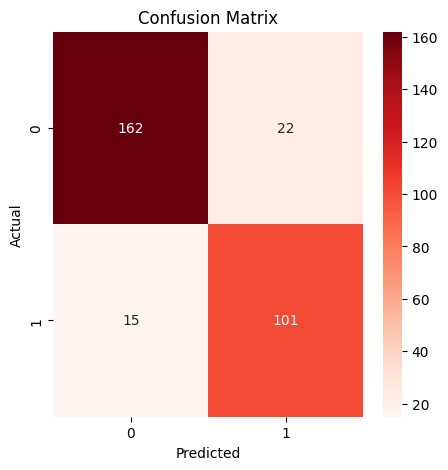

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cnm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,5))
sns.heatmap(cnm, annot=True, fmt='d', cmap='Reds')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


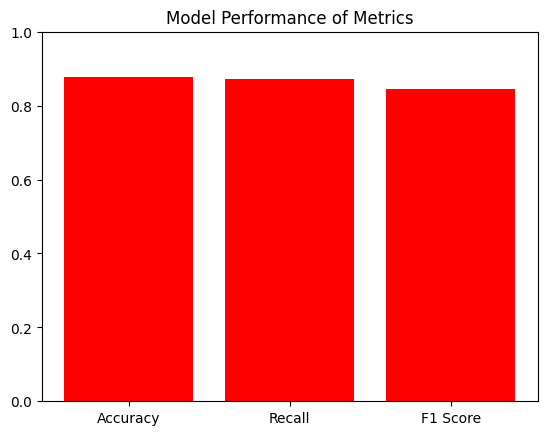

In [15]:
metrixs = {
    "Accuracy": accuracy_score(y_test, y_pred),
    "Recall": recall_score(y_test, y_pred),
    "F1 Score": f1_score(y_test, y_pred)
}

plt.bar(metrixs.keys(), metrixs.values(), color='Red')
plt.ylim(0,1)
plt.title("Model Performance of Metrics")
plt.show()


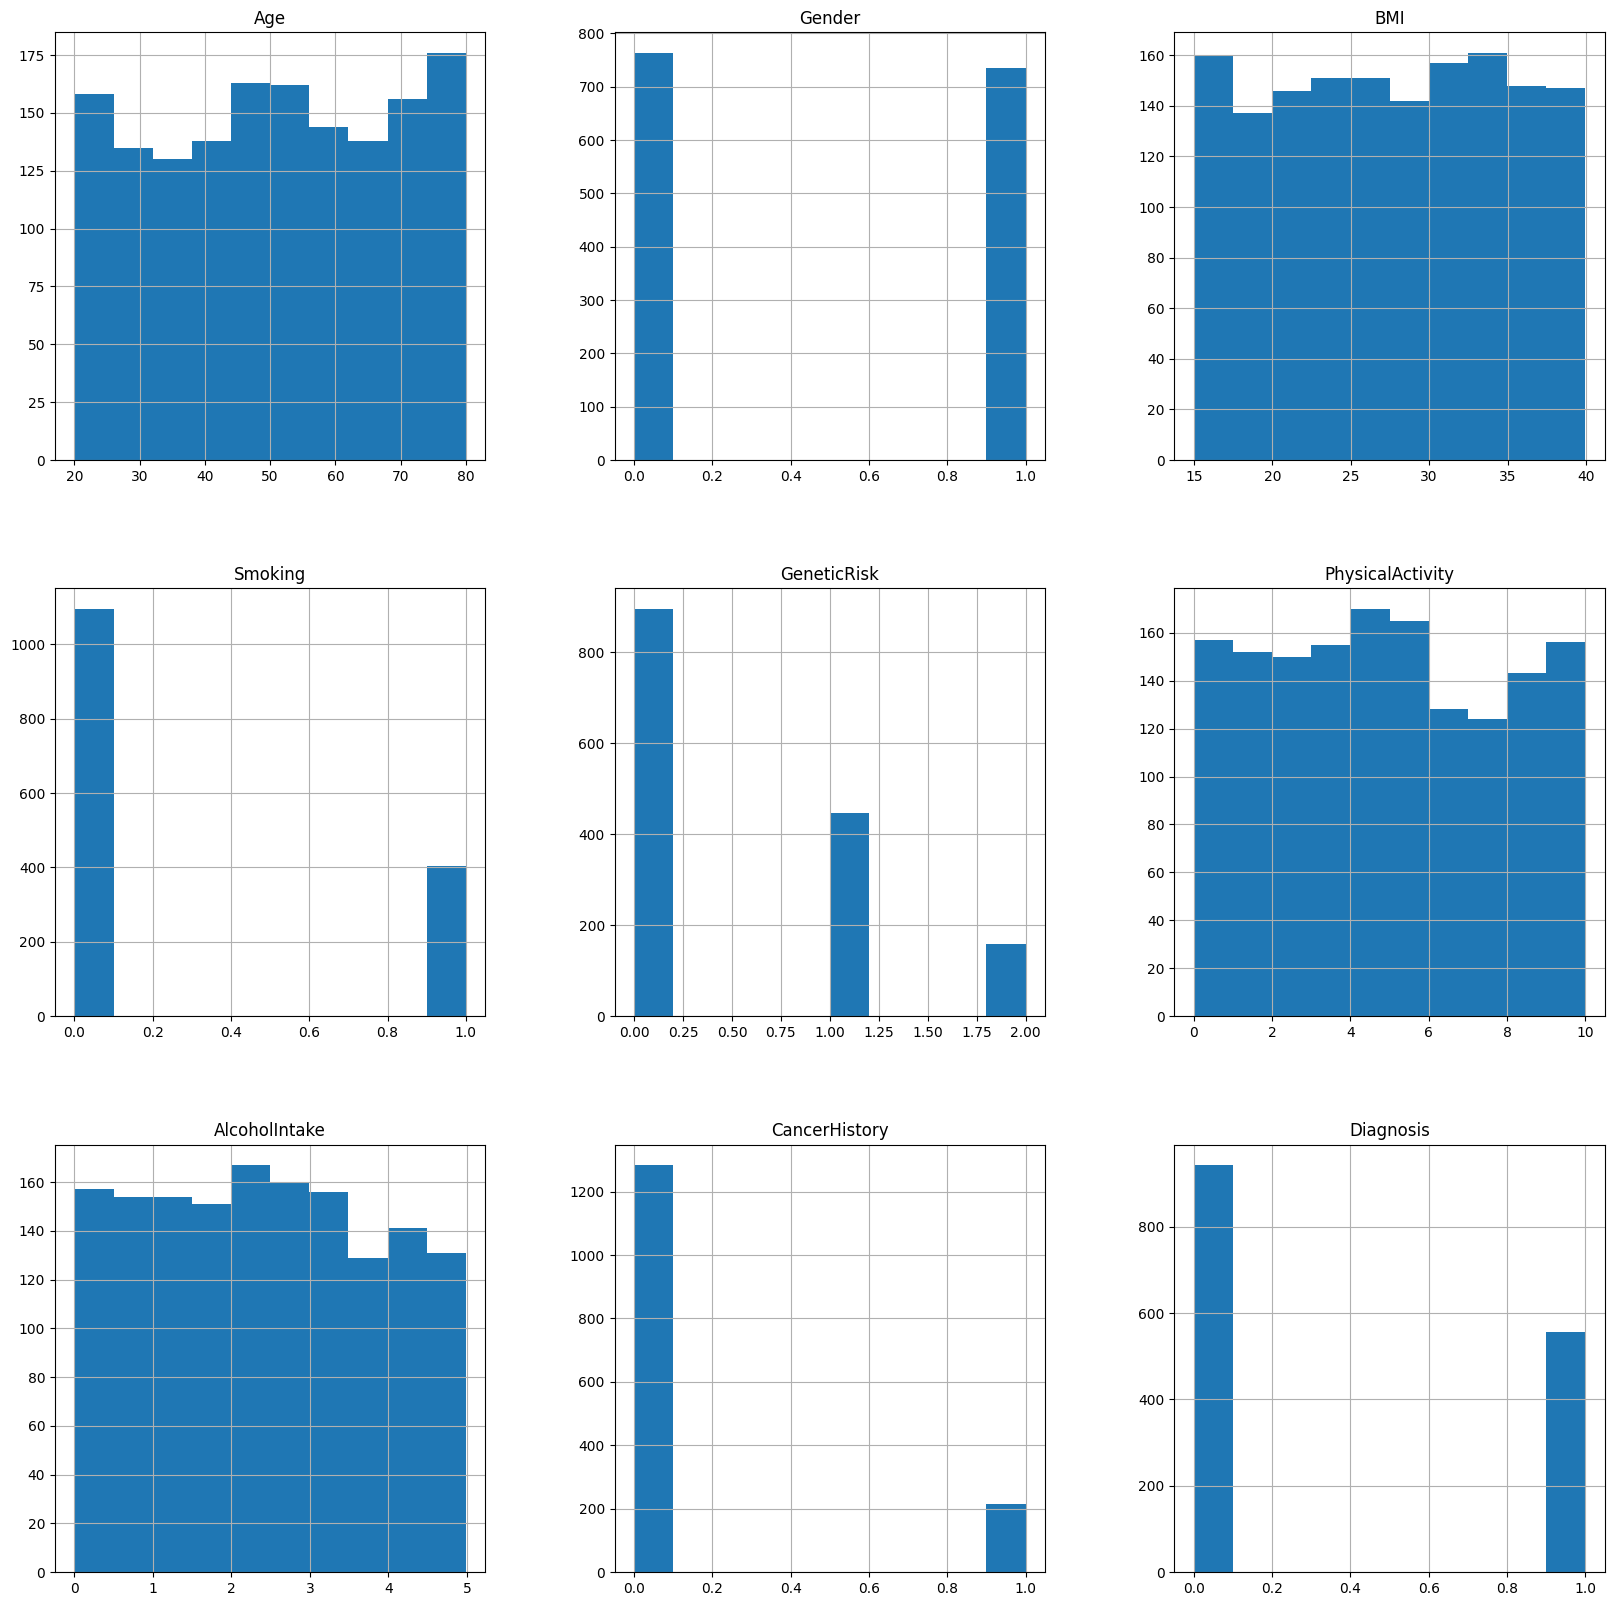

In [16]:
### to see the datasets or all columns
df.hist(figsize = (20,20));